In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
paths = [
    './fixseed/seed33333/DNPG_base_transformer_training.txt',
    './fixseed/seed33333/transformer_key_enc_bert_val_attention_alpha0.5.txt'
]

In [3]:
train_ppls = []
train_accs = []
val_ppls = []
val_accs = []

In [4]:
def extract_ppl_acc(path):
    regex = 'ppl:  (\d*.\d*), accuracy: (\d*.\d*)'
    train_ppl = []
    train_acc = []
    val_ppl = []
    val_acc = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            match = re.search(regex, line)
            if not match:
                continue
            ppl = float(match.group(1))
            acc = float(match.group(2))

            if 'Training' in line:
                train_ppl.append(ppl)
                train_acc.append(acc)
            else:
                val_ppl.append(ppl)
                val_acc.append(acc)
    return train_ppl, train_acc, val_ppl, val_acc



In [5]:
for path in paths:
    train_ppl, train_acc, val_ppl, val_acc = extract_ppl_acc(path)
    train_ppls.append(train_ppl)
    train_accs.append(train_acc)
    val_ppls.append(val_ppl)
    val_accs.append(val_acc)

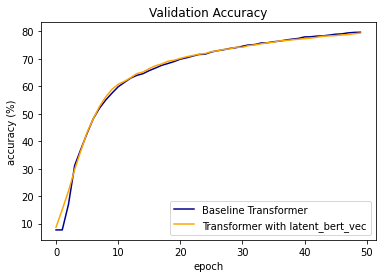

In [6]:
# acc
to_plot = val_accs
colors = ['darkblue', 'orange']
labels = ['Baseline Transformer', 'Transformer with latent_bert_vec']

for i, val in enumerate(to_plot):
    plt.plot(val, color=colors[i], label=labels[i])

plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy (%)')
plt.title('Validation Accuracy')
plt.savefig('./figs/val_acc.png')
plt.show()

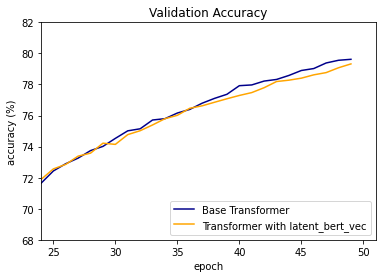

In [18]:

# acc
to_plot = val_accs
colors = ['darkblue', 'orange']
labels = ['Base Transformer', 'Transformer with latent_bert_vec']

start_epoch = 25
end_epoch = 51
for i, val in enumerate(to_plot):
    plt.plot(val, color=colors[i], label=labels[i])

plt.xticks(np.arange(start_epoch, end_epoch, 5))
plt.xlim(start_epoch-1, end_epoch)
plt.ylim(68, 82)
    
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy (%)')
plt.title('Validation Accuracy')
plt.savefig('./figs/val_acc_start_{}.png'.format(start_epoch))
plt.show()


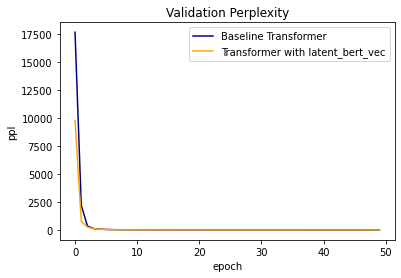

In [7]:
# ppl
# acc
to_plot = val_ppls
colors = ['darkblue', 'orange']
labels = ['Baseline Transformer', 'Transformer with latent_bert_vec']

for i, val in enumerate(to_plot):
    plt.plot(val, color=colors[i], label=labels[i])

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('ppl')
plt.title('Validation Perplexity')

plt.savefig('./figs/val_ppl.png')
plt.show()

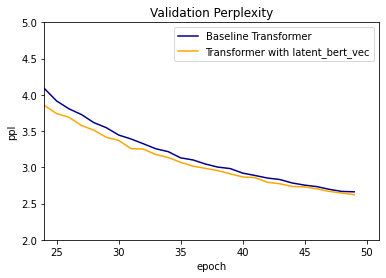

In [8]:

# acc
to_plot = val_ppls
colors = ['darkblue', 'orange']
labels = ['Baseline Transformer', 'Transformer with latent_bert_vec']

start_epoch = 25
end_epoch = 51
for i, val in enumerate(to_plot):
    plt.plot(val, color=colors[i], label=labels[i])

plt.xticks(np.arange(start_epoch, end_epoch, 5))
plt.xlim(start_epoch-1, end_epoch)
plt.ylim(2, 5)
    
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('ppl')
plt.title('Validation Perplexity')
plt.savefig('./figs/val_ppl_start_{}.png'.format(start_epoch))
plt.show()

